In [22]:
# -*- coding: UTF-8 -*-
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas
import numpy as np

In [23]:
X = pandas.read_json("..\\jsons\\main_X.json", lines = True)
Y = pandas.read_json("..\\jsons\\main_Y.json", lines = True)

In [24]:
X = X.astype({"Country":'float', "City":'float', "Institution": 'float'}) 

Y['connected'] = Y['connected'].astype(float)

In [25]:
X.head()

,Country,City,Institution,hIndex,Citations,Documents,jaccardCoef,Areas
0,1.0,1.0,1.0,0.50000,0.08182,0.25000,0.04348,0.33333
1,0.0,0.0,0.0,0.20000,0.06478,0.16438,0.02128,0.35714
2,1.0,0.0,0.0,0.21053,0.10358,0.15584,0.08451,0.50000
3,0.0,0.0,0.0,0.36364,0.23207,0.19355,0.06250,0.44444
4,1.0,0.0,0.0,0.63333,0.53180,0.96104,0.05085,0.55556


In [26]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)

In [27]:
print(len(Y),len(Y_train),len(Y_val))

2108 1686 422


In [28]:
model = keras.Sequential([
	keras.Input(shape = (8)),
	keras.layers.Dense(16, activation='relu'),
	keras.layers.Dense(8, activation='relu'),
	keras.layers.Dense(4, activation='relu'),
	keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
	loss = keras.losses.BinaryCrossentropy(),
	metrics = [keras.metrics.BinaryAccuracy(name='accuracy', threshold=0.5)])

model.build()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                144       
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dense_14 (Dense)            (None, 4)                 36        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(X_train.to_numpy(), Y_train.to_numpy(), epochs=500, batch_size=64, shuffle = True, validation_data = (X_val.to_numpy(), Y_val.to_numpy()))

Epoch 1/500
27/27 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.5819 - val_loss: 0.6778 - val_accuracy: 0.6635
Epoch 2/500
27/27 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.7058 - val_loss: 0.6596 - val_accuracy: 0.7062
Epoch 3/500
27/27 [==============================] - 0s 1ms/step - loss: 0.6437 - accuracy: 0.7278 - val_loss: 0.6329 - val_accuracy: 0.7393
Epoch 4/500
27/27 [==============================] - 0s 1ms/step - loss: 0.6112 - accuracy: 0.7414 - val_loss: 0.6001 - val_accuracy: 0.7512
Epoch 5/500
27/27 [==============================] - 0s 1ms/step - loss: 0.5745 - accuracy: 0.7716 - val_loss: 0.5651 - val_accuracy: 0.7630
Epoch 6/500
27/27 [==============================] - 0s 1ms/step - loss: 0.5401 - accuracy: 0.7912 - val_loss: 0.5360 - val_accuracy: 0.7773
Epoch 7/500
27/27 [==============================] - 0s 1ms/step - loss: 0.5104 - accuracy: 0.7995 - val_loss: 0.5065 - val_accuracy: 0.8009
Epoch 8/500
2

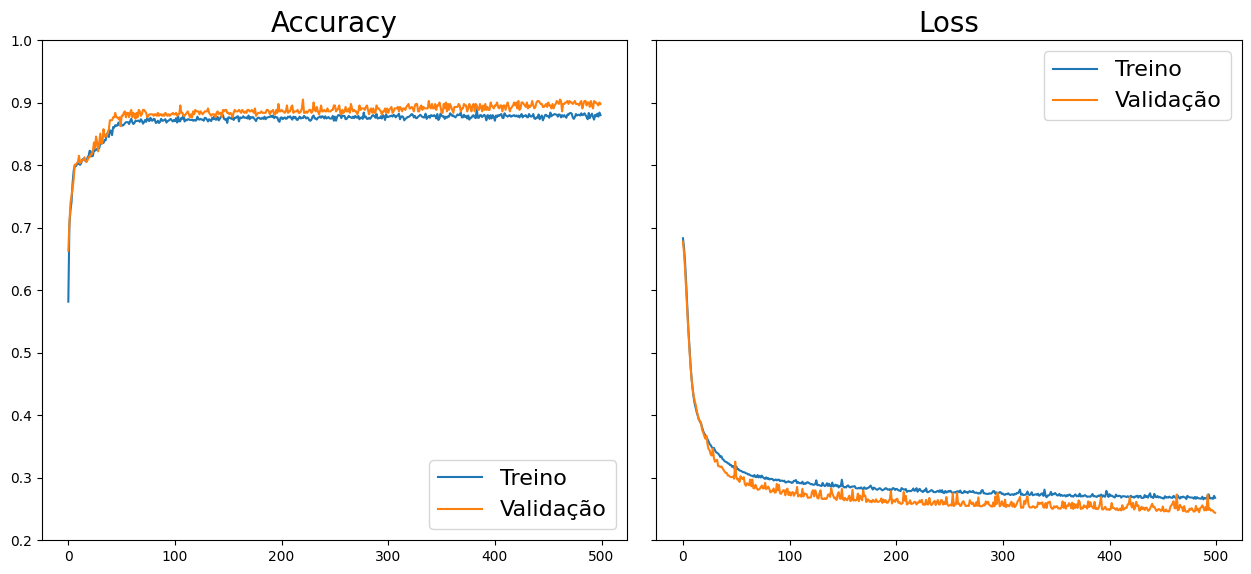

[0.24411332607269287, 0.8981042504310608]

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
ax[0].plot(history.history["accuracy"], label = "Treino")
ax[0].plot(history.history["val_accuracy"], label = "Validação")
ax[1].plot(history.history["loss"], label = "Treino")
ax[1].plot(history.history["val_loss"], label = "Validação")
ax[0].set_title("Accuracy", size = 20)
ax[1].set_title("Loss", size = 20)

plt.subplots_adjust(left=0, right=1,
                    bottom=0, top=1,
                    wspace=0.05, hspace=0)

# plt.tight_layout()
ax[0].legend(loc = 4, prop={'size': 16})
ax[1].legend(prop={'size': 16})
plt.ylim([0.2, 1])
plt.show()

model.evaluate(X_val.to_numpy(), Y_val.to_numpy(), batch_size=64, verbose=0)

In [33]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_val, batch_size=64, verbose=0)
y_pred_bool = y_pred > 0.5

print(classification_report(Y_val, y_pred_bool, digits=3))

              precision    recall  f1-score   support

         0.0      0.901     0.905     0.903       221
         1.0      0.895     0.891     0.893       201

    accuracy                          0.898       422
   macro avg      0.898     0.898     0.898       422
weighted avg      0.898     0.898     0.898       422

